## Example Drifter data handling 

## Set up

#### Imports

The first step is to import the Python packages required for post-processing the data and plotting. 

<div class="alert alert-block alert-success"> 
<b>Tip:</b> You may need to set the Kernel to the relevant (Conda) environment in the top right of this notebook to access the required packages! 
</div>

In [69]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
from matplotlib.collections import LineCollection

#### Data directory

Next, you should set `data_dir` to be the path to your expedition results in the code block below. You should replace `"/path/to/EXPEDITION/results/"` with the path for your machine.

<div class="alert alert-block alert-success"> 
<b>Tip:</b> You can get the path to your expedition results by navigating to the `results` folder in Terminal (using `cd`) and then using the `pwd` command. This will print your working directory which you can copy to the `data_dir` variable in this notebook. Don't forget to keep it as a string (in "quotation" marks)!
</div>

In [2]:
# data_dir = "/path/to/EXPEDITION/results/"  # set this to be where your expedition output data is located on your (virtual) machine

data_dir = "~/Documents/test_expeditions/drifters/NEP/results/"  # set this to be where your expedition output data is located on your (virtual) machine

In [23]:
# load argo data
drifter_ds = xr.open_dataset(f"{data_dir}/drifter.zarr")

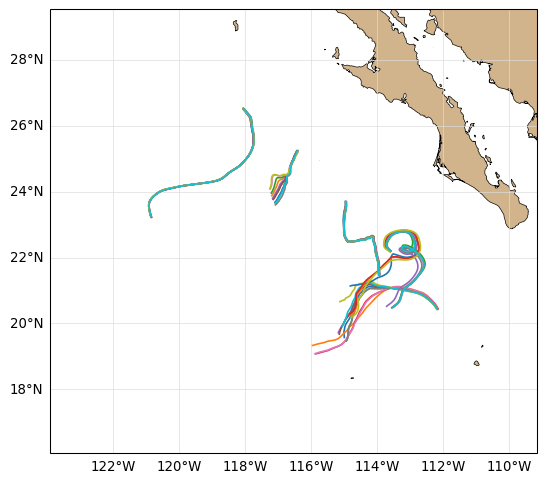

In [ ]:
## Argo float trajectory plot

# fig
fig = plt.figure(figsize=(10, 6), dpi=96)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# plot trajectory
for i, traj in enumerate(drifter_ds["trajectory"]):
    # extract trajectory data
    lons = drifter_ds["lon"][:].sel(trajectory=traj).squeeze()
    lats = drifter_ds["lat"][:].sel(trajectory=traj).squeeze()

    # plot
    ax.plot(
        lons,
        lats,
        linestyle="-",
        linewidth=1.25,
        zorder=3,
        label=f"Drifter {int(traj)}",
        transform=ccrs.PlateCarree(),
    )


# additional map features
latlon_buffer = 3.0  # degrees (adjust this to 'zoom' in/out in the plot)
ax.set_extent(
    [
        drifter_ds.lon.min() - latlon_buffer,
        drifter_ds.lon.max() + latlon_buffer,
        drifter_ds.lat.min() - latlon_buffer,
        drifter_ds.lat.max() + latlon_buffer,
    ],
    crs=ccrs.PlateCarree(),
)
ax.coastlines(linewidth=0.5, color="black")
ax.add_feature(cfeature.LAND, facecolor="tan")
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gainsboro",
    alpha=1.0,
    linestyle="-",
    zorder=0,
)
gl.top_labels = False
gl.right_labels = False

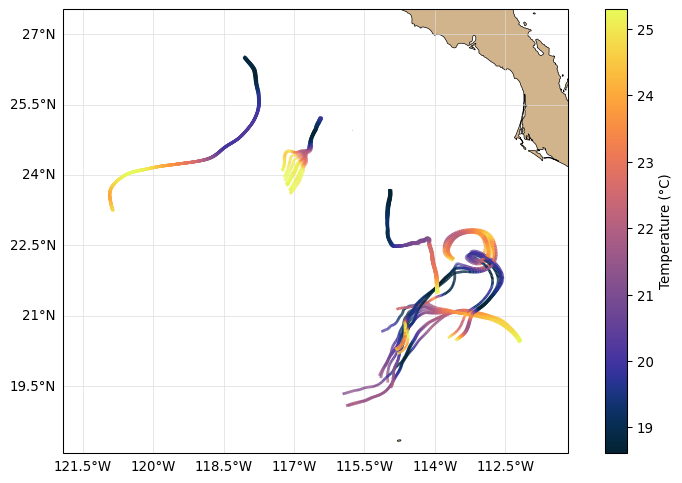

In [81]:
## Argo float trajectory plot

plot_variable = "temperature"

# fig
fig = plt.figure(figsize=(10, 6), dpi=96)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# plot trajectory colored by temperature / salinity
for i, traj in enumerate(drifter_ds["trajectory"]):
    # extract trajectory data
    lons = drifter_ds["lon"][:].sel(trajectory=traj).squeeze().values
    lats = drifter_ds["lat"][:].sel(trajectory=traj).squeeze().values
    var = drifter_ds[plot_variable][:].sel(trajectory=traj).squeeze().values

    # create segments for LineCollection
    points = np.array([lons, lats]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # create a LineCollection colored by temperature
    lc = LineCollection(
        segments,
        cmap=cmo.thermal,
        norm=mcolors.Normalize(vmin=np.nanmin(var), vmax=np.nanmax(var)),
        array=var[:-1],
        linewidth=2,
        zorder=3,
        transform=ccrs.PlateCarree(),
    )
    ax.add_collection(lc)


# additional map features
latlon_buffer = 1.0  # degrees (adjust this to 'zoom' in/out in the plot)
ax.set_extent(
    [
        drifter_ds.lon.min() - latlon_buffer,
        drifter_ds.lon.max() + latlon_buffer,
        drifter_ds.lat.min() - latlon_buffer,
        drifter_ds.lat.max() + latlon_buffer,
    ],
    crs=ccrs.PlateCarree(),
)
ax.coastlines(linewidth=0.5, color="black")
ax.add_feature(cfeature.LAND, facecolor="tan")
gl = ax.gridlines(
    draw_labels=True,
    linewidth=0.5,
    color="gainsboro",
    alpha=1.0,
    linestyle="-",
    zorder=0,
)
gl.top_labels = False
gl.right_labels = False

# add colorbar
sm = plt.cm.ScalarMappable(
    cmap=cmo.thermal,
    norm=mcolors.Normalize(
        vmin=float(drifter_ds.temperature.min()),
        vmax=float(drifter_ds.temperature.max()),
    ),
)
sm._A = []
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", label="Temperature (°C)")

## Add temperature/salinity data to plot

## Interpreting drifter trajectories

<div class="alert alert-block alert-info"> 
<b>NOTE:</b> This section will likely look different from your own results - you will have run your own drifter simulations with different initial positions and times! This is just an example to demonstrate the kinds of drifter flow dynamics questions you can start to think about.
</div>

The Atlantic and Indian Ocean meet around South Africa, and this is one of the most dynamic and energetic regions in the world ocean. The Agulhas retroflection is a region where the Agulhas current retroflects back into the Indian Ocean. This region is known for its strong currents and eddies, and is a region where many drifters have been deployed.

Below is an example of a previous VirtualShip drifter experiment in the Agulhas region, showing the trajectories of 20 virtual drifters launched from a line at 31S between 31E and 32E (see red dots) on the 2 and 21 July 2023, one each day at midnight, simulated forward in time 90 days.



![trajectories](./assets/trajan_drifters.png)

As you see, the drifters all start in the Agulhas Current (red dots at 30S) and most are initially advected southwestwards (although some first move northeastwards). At least two drifters take a path farther offshore, where their trajectories are much more eddying. When the inshore drifters reach approximately 25E, some of them start to circulate in eddies, and their tracks become even more convoluted.

One potentially interesting analysis could be to compare the starting longitude to the final longitude. Do the drifters that start on the inshore side of the Agulhas Current have a higher chance to end up in the Atlantic Ocean (aka Agulhas leakage) than the drifters that start on the offshore side?

![final_vs_start_lon](./assets/initial_vs_final_drifters.png)

How do you interpret this plot? Is it what you expected? 

What other analyses could be interesting to do with this data? Would it be interesting to look at the temperature or salinity that the drifters experience along their trajectories?